# Chapter 1. The Nature of Time Series Data

In this chapter, we begin to delve into the properties of Ordinary Least Square (OLS) for estimating linear regression models using time series data.

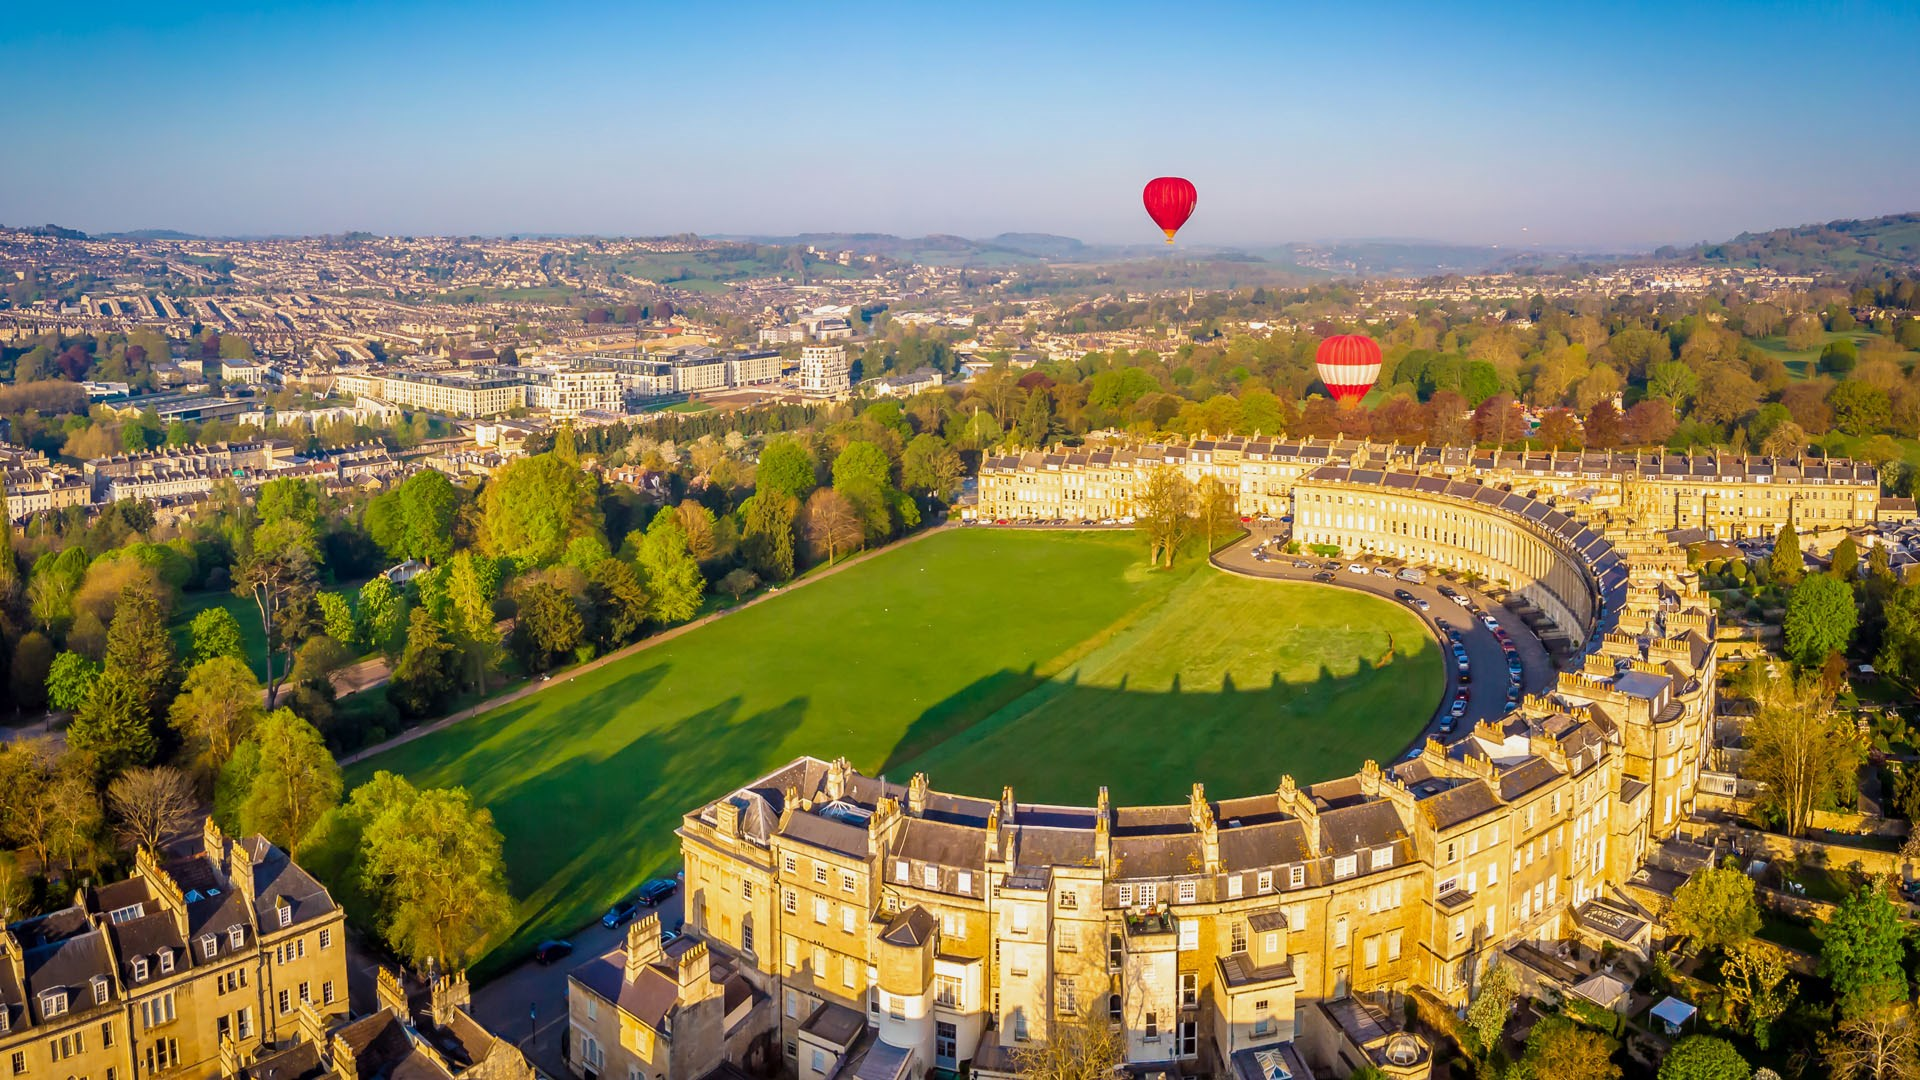

## Before we take off, you need to know ···

### In general, data can be simply classified to four types:
- 1. Cross-sectional data
- 2. **Time series data**
- 3. Panel data 
- 4. Pooled cross section

### Assumptions of Classical Linear Regression Models
- **MLR.1 Linear in Parameters**

  The model in the population can be written as
  
  $$ y=\beta_0+\beta_1x_1+\beta2x_2+···+\beta_kx_k+u $$
  
  where ${\beta_1, \beta2, ···, \beta_k}$ are the unknown parameters (constants) of interest and $u$ is an unobserved random error or disturbance term.  
  
  
- **MLR.2 Random Sampling**  


- **MLR.3 No Perfect Collinearity**  
  None of the independent variables is constant, and there are no exact linear relationships among the independent variables.  
  
  
- **MLR.4 Zero Conditional Mean**<br>
  The error $u$ has an expected value of zero given any values of the independent variables
  $$E(u|x_1, x_2, ···, x_k)=0$$
  
  
- **MLR.5 Homoskedasticity**<br>
  The error $u$ has the same variance given any values of the explanatory variables
  $$Var(u|x_1, x_2, ···, x_k)=\sigma^2$$  
  

- **MLR.6 Normality in Error Terms**

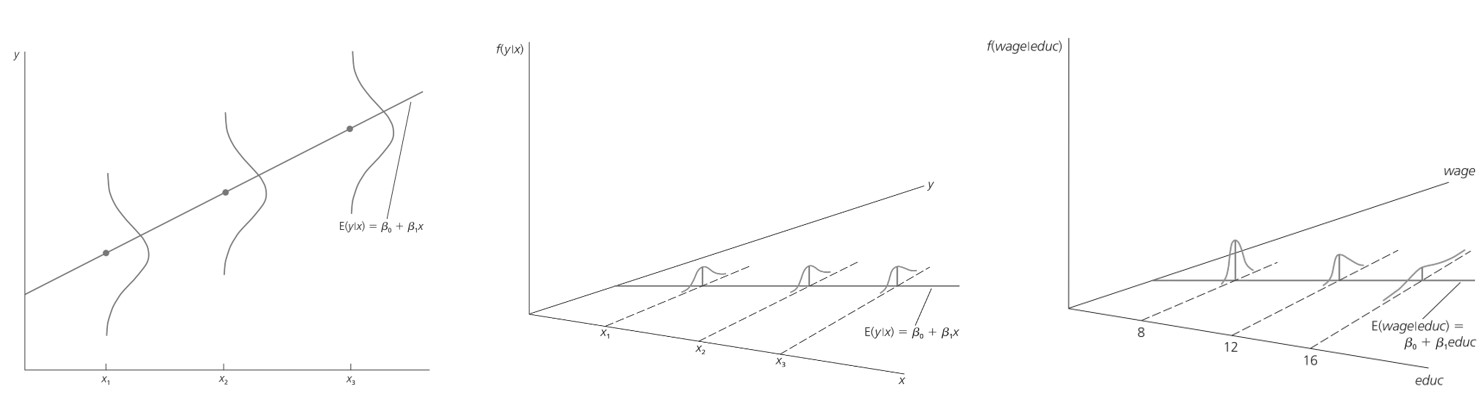  


$$ Data\ Distribution\ of\ Each\ Variables $$

### Tips  


- **Under assumptions MLR.1 - MLR.4** the OLS estimators are unbiased estimators of the population parameters.<br>  


- **Under assumptions MLR.1 - MLR.5** Gauss-Markov Theorem: Best Linear Unbiased Estimators (BLUEs).  


- **Under assumptions MLR.1 - MLR.6** Assumptions of the Classical Linear Regression Model (CLRM).

## The Properties of Time Series Data

In this section, we focus on the properties of time series data to mine the corresponding characteristics when modeling specific phenomena.

### 1. The Difference between Cross-sectional Data & Time Series Data  


- **Temporal ordering.<br>**  


- **Time series data violates the assumption of random sampling.<br>**
  Cross sectional data can be viewed as random outcomes, a different sample drawn from population will generally yield different values. 
  
  However, time series data is the consequence of a **stochastic process**. We can only see a single outcome, because we cannot go back in time and start the process again. In other words, we can only observe one random sample

**Example 1.**  


Jack ate rice the day before yesterday. He ate pizza yesterday and noodles today.
What will Jack eat tomorrow?

**The Structure of Time Series Data** Versus **The Structure of Random Sampled Time Series Data(Synthetic)**

In [2]:
import pandas as pd
import numpy as np

columns = ['The Day Before Yesterday', 'Yesterday', 'Today']
example1 = ['Rice', 'Pizza', 'Noodles']
example2 = ['Rice', 'Noodles', 'Pizza']
example3 = ['Pizza', 'Rice', 'Noodles']
example4 = ['Pizza', 'Noodles', 'Rice']
example5 = ['Noodles', 'Pizza', 'Rice']
example6 = ['Noodles', 'Rice', 'Pizza']
example = [example1, example2, example3, example4, example5, example6]

TS1 = pd.DataFrame(data=np.array(example1).reshape(-1,3), columns=columns)
TS2 = pd.DataFrame(data=example, columns=columns)
print('Time series data')
TS1.head()

Time series data


,The Day Before Yesterday,Yesterday,Today
0,Rice,Pizza,Noodles


In [3]:
print('The Structure of Random Sampled Time Series Data(Synthetic):')
TS2.head()

The Structure of Random Sampled Time Series Data(Synthetic):


,The Day Before Yesterday,Yesterday,Today
0,Rice,Pizza,Noodles
1,Rice,Noodles,Pizza
2,Pizza,Rice,Noodles
3,Pizza,Noodles,Rice
4,Noodles,Pizza,Rice


### 2. Impact Propensity & Long Run Propensity  

In this part, we aim to provide an intuition on two important properties of time series data: Impact Propensity & Long Run Propensity.

#### (1) Static Model：Fundamental Identification of Time Series Regression Models

Suppose that we have time series data available on two variables, say ***y*** and ***x***, where $y_t$ and $z_t$ are dated contemporaneously. A static model relating ***y*** to ***x*** is  
 
 
$$y_t = \alpha_0 + \alpha_1x_t + \mu_t, t=1,2,3,……,n$$

Usually, a static model is postulated when a change in ***x***  at time ***t***  is believed to have an immediate effect on ***y*** :
$$Δy_t=\beta_1Δx_t,\ when\ Δ\mu_t=0$$

#### (2) Finite Distributed Lag Model (FDL)

There are seveal points we need to clarify before delving into FDL.  


- The first question we need to clarify is: **What is Lag Effect**?<br>

  **Lag effects ocurr everywhere！**

  **Intuition**： Explanatory variable might have a casual effect on the response variable, but the casual effect occurs gradually, and manifests in changes to the response later in time.
  
  **Fundamental Modeling Approach**：A regression equation is used to predict current values of a response variable based on both current values of an explanatory variable and the lagged values of this explanatory variables.
  
  **Finite Distribution Model (FDL)**：We allow one or more variables to affect y with a lag. The following equation is an example of the model
  
  $$y_t = \beta_0 + \alpha_0x_t + \alpha_1x_{t-1}+ \alpha_2x_{t-2}+ \mu_t, t=1,2,3,\dots,n$$
  
  which is an FDL *of order two*.

- As for the second question, we focus on identifying **the potential reasons for lag effects.**
 - Human Behaviors;
 - Policy;
 - Techniques···<br>

#### (3) Impact Propensity

- **Defination**：In a distributed model, the immediate change in the response variable given a one-unit increase in the explanatory variable.   


- **Intuition**：How to interpret the coefficients of FDL?

  Take an FDL of order two as example:
  
  $$y_t = \beta_0 + \alpha_0x_t + \alpha_1x_{t-1}+ \alpha_2x_{t-2}+ \mu_t, t=1,2,3,\dots,n$$
  
  Suppose $x$ is a constant, equal to c, in all time periods before time $t_0$. $c$ increases by one unit to $c+1$ at time $t_0$ and then reverts to its previous level at time $t+1$, in other words
  $$x_t=c+1 \cdots t=t_0\\x_t=c \cdots t\not=t_0$$
  
  To focus on the ceteris paribus effect of $x$ on $y$, we set the error term in each time period to zero, then:
  
  $$y_{t_0-1}=\beta_0 + \alpha_0c + \alpha_1c+ \alpha_2c\\
  y_{t_0}=\beta_0 + \alpha_0(c+1) + \alpha_1c+\alpha_2c\\
  y_{t_0+1}=\beta_0 + \alpha_0c + \alpha_1(c+1)+\alpha_2c\\
  y_{t_0+2}=\beta_0 + \alpha_0c + \alpha_1c+\alpha_2(c+1)\\
  y_{t_0+3}=\beta_0 + \alpha_0c + \alpha_1c+\alpha_2c$$

  From the first two equations, $y_t-y_{t-1}=\alpha_0$, which shows that $\alpha_0$ is the immediate change in $y$ due to the one-unit increase in $x$ at time $t_0$. $\alpha_0$ is usually called the **impact propensity**.

#### (4) Long Run Propensity(LRP)

- **Defination**：Long run propensity(LRP) refers to the cumulative effect following a permanent one-unit change in the explanatory variable.

- **Intuition**：We are also interested in the change in $y$ due to a permanent increse in $x$. Similarly, we assume another special case: 

  $$x_t=c \cdots t<t_0\\x_t=c+1 \cdots t≥t_0$$
  
  To focus on the ceteris paribus effect of $x$ on $y$, we set the error term in each period of time to zero, then:
  
  $$y_{t_0-1}=\beta_0 + \alpha_0c + \alpha_1c+ \alpha_2c\\
  y_{t_0}=\beta_0 + \alpha_0(c+1) + \alpha_1c+\alpha_2c\\
  y_{t_0+1}=\beta_0 + \alpha_0(c+1) + \alpha_1(c+1)+\alpha_2c\\
  y_{t_0+2}=\beta_0 + \alpha_0(c+1) + \alpha_1(c+1)+\alpha_2(c+1)$$
  
  We can notice that, the sum of the coefficients on current and lagged $x$, $\alpha_0+\alpha_1+\alpha2$, is the long-run change in y given a permanent increase in $x$ and is called the long-run propensity(LRP).
  
  **In summary, the LRP of a finite distributed lag model of order q can be calculated by the sum of all the coefficients:**
  
  $$LRP=\alpha_0 + \alpha_1+\alpha_2+\cdots+\alpha_q$$

#### (5) Lag Distribution  


When we graph the $\alpha_i$ as a function of $i$, we obtain the **lag distribution**, which summarizes the dynamic effect that a temporary increase in $c$ on $y$.

**Example 2.**  


An example of lag distribution.

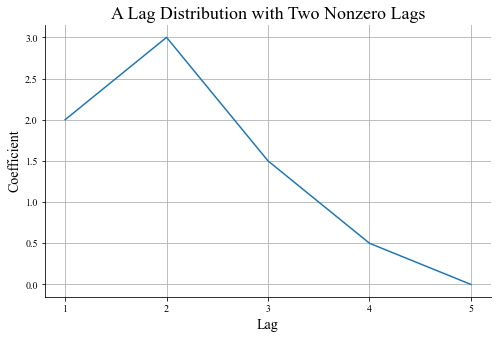

In [4]:
import matplotlib.pyplot as plt

lag = [1,2,3,4,5]
coefficient = [2,3,1.5,0.5,0]

plt.rc('font',family='Times New Roman')    # Font setting

fig0, ax0 = plt.subplots(figsize=(8,5))
ax0.plot(lag, coefficient)

# Axis settings
ax0.set_xlabel("Lag", fontsize=14)
ax0.set_ylabel("Coefficient", fontsize=14)
ax0.set_title("A Lag Distribution with Two Nonzero Lags",fontsize=18)
ax0.set_xticks(lag)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.grid()
plt.show()

### 3. Trend & Seasonality

#### (1) Data Description  


The data utilized in this section illustrates simultaneous GDP fluctuations for both the USA and Australia.  Sourced from publicly available data on the internet, it spans a total of 126 periods.

#### (2) Trend

 We plot the GDP fluctuations of the USA and observe a consistent upward trend over time.

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

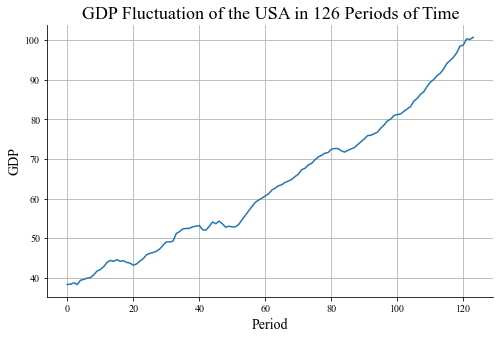

In [6]:
TSData1 = pd.read_stata(r'./data/gdp.dta')    # Your data

# Line plot
plt.rc('font',family='Times New Roman')    # Font setting
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(TSData1['usa'])

ax1.set_xlabel('Period', fontsize=14)
ax1.set_ylabel('GDP', fontsize=14)
ax1.set_title('GDP Fluctuation of the USA in 126 Periods of Time', fontsize=18)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid()
plt.show()

**What kind of statistical models adequately capture trending behavior?**

If we want to model GDP fluctuations in the USA, there are several models for us to choose from.
- **Modeling Idea 1：Linear time trend**

$$GDP_{year} = α_0 + α_1year + u_{year},  year = 1,2,3,…$$

- **Modeling Idea 2：Exponential trend** <br>

  A series has the same average growth rate from period to period, in other words, $\alpha_1$ is approximately the average per period growth rate in $GDP_{year}$.

$$log(GDP_{year}) = α_0 + α_1year + u_{year},  year = 1,2,3,…$$

$$Δlog(GDP_{year}) ≈ \cfrac{GDP_{year} - GDP_{year-1}}{GDP_{year-1}}=\alpha_1$$ 

- **Modeling Idea 3：More complex forms (Quadratic form.etc)**

$$GDP_{year} = α_0 + α_1{year} + α_2year^2 + u_{year},  year = 1,2,3,…$$

**Attention：Spurious Regression Problem**

- **Defination**<br>
  The phenomenon of finding a relationship between two or more trending variables simply because each is growing over time is an example of a spurious regression problem.  
  
  
- **Intuition**<br>
  If we attempt to explain the GDP fluctuations of Australia using the GDP of the USA, we might achieve a high R-squared because the GDP trends of both countries share similar characteristics. However, it is important to note that GDP changes in Austrlia do not cause fluctuations in the USA. As a result, we need to consider that **unobserved, trending factors that affect response variable might also be correlated with the explanatory variables.**
  

- **Problem Eliminate**：
  Unit root test

#### (3) Seasonality

If a time series is observed at monthly or quarterly intervals(or even weekly or daily), it may exhibit **seasonality**.

- **Intuition**<br>
  Monthly housing starts in the Midwest of the USA are strongly influenced by weather. Although weather patterns are somewhat random, we can be sure that the weather during January will usually be more inclement than in June, and so housing starts are generally higher in June than in January.  
  
  
- **Possible Reasons**
  1. **Weather factors**: winter heating & energy consumption
  2. **Administrative factors**：holiday & traffic volume
  3. **Holiday**："double eleven" & shopping behavior
  4. **Calendar**: leap years & leap months  

**Seasonal Adjustment**<br>  

- **Intuition**<br>
Even though many monthly and quarterly data series display seasonal patterns, not all of them do. For example, there is no noticeable seasonal pattern in monthly interest or inflation rates. In addition, series that do display seasonal patterns are often **seasonally adjusted** before they are reported for public use.  



- **Principle of seasonal adjustment：Decomposition of time series data**<br>
Time series data can be decomposed into several parts：  
  **Systematic**: Components that exhibit consistency or repetitiveness can be described and modeled.<br>
  **Non-Systematic**: Components that cannot be described.<br>  
  

- Time sereis data can be decomposed into **Four Parts：**

 - **Level**：Expection of the given time series.
 
 - **Trend**：The long-term movement in the data, representing the underlying pattern.
 
 - **Seasonality**：The repeating, short-term fluctuations caused by factors like seasons or cycles.
 
 - **Noise**：Random variability that remains after removing the trend and seasonality. 
 
 
- The time series decomposition techniques  can be categorized into **two types**.  

 - **Additive Model：**<br> $$ y(t) = Level + Trend + Seasonality + Noise $$  
 
 - **Multiplicative Model(Common in economic phenomenon)：**<br>$$y(t) = Level * Trend * Seasonality * Noise$$

**Example 4.**  


**Seasonal adjustment using additive model.**  


**Python Packages：**<br>
- [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)<br>
- [matplotlib.figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure)


The result of decompostion shows that there is significant seasonality in the GDP fluctuations of the USA.

In [7]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)    # Ignore all the future warning
warnings.filterwarnings('ignore', category=UserWarning)     # Ignore all the user warning

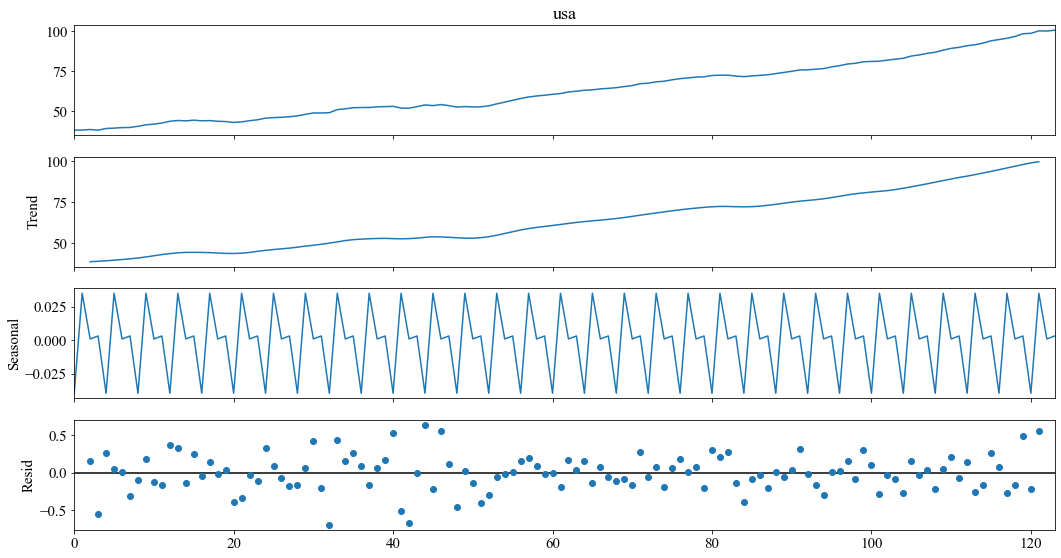

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# GDP is generally reported on a quarterly basis
result = seasonal_decompose(TSData1['usa'], model='additive',period=4)    # Param period=4
plt.rc('font',family='Times New Roman',size=15)    # Font setting
fig3 = result.plot()
fig3.set_size_inches(15,8)
fig3.tight_layout()
plt.show()

**Example 5.**  


**Seasonal adjustment using multiplicative model.**<br>   


**Python Packages：**<br>
- [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)<br>
- [matplotlib.figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure)


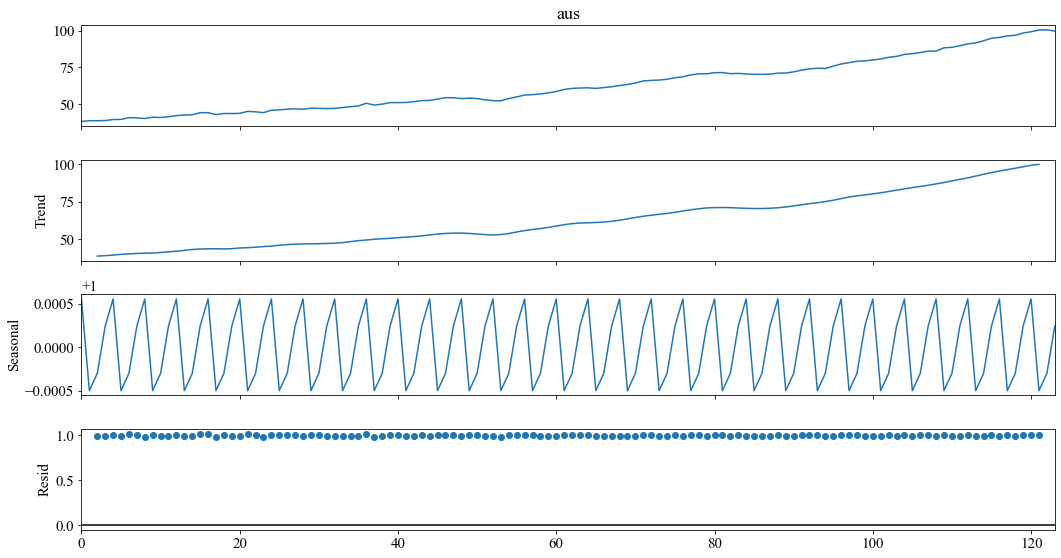

In [36]:
result = seasonal_decompose(TSData1['aus'], model='multiplicative', period=4)
plt.rc('font',family='Times New Roman',size=15)    # Font setting

fig4 = result.plot()
fig4.set_size_inches(15,8)
fig4.tight_layout()
plt.show()

### 4. Stationary & Non-stationary

#### (1) Conditions for Stationary Time Series
For variables and all their lagged terms, the following conditions need to be met:  


$$E(y_t)=\mu (Constant Mean)$$
$$Var(y_t)=\sigma^2 (Constant Variance)$$
$$cov(y_t,y_{t+s})=cov(y_t,y_{t-s})=\gamma_s (Covariance depends on s not t)$$

**Example 6.**  


**Please observe the following plots, which ones dipict stationary time series data?**

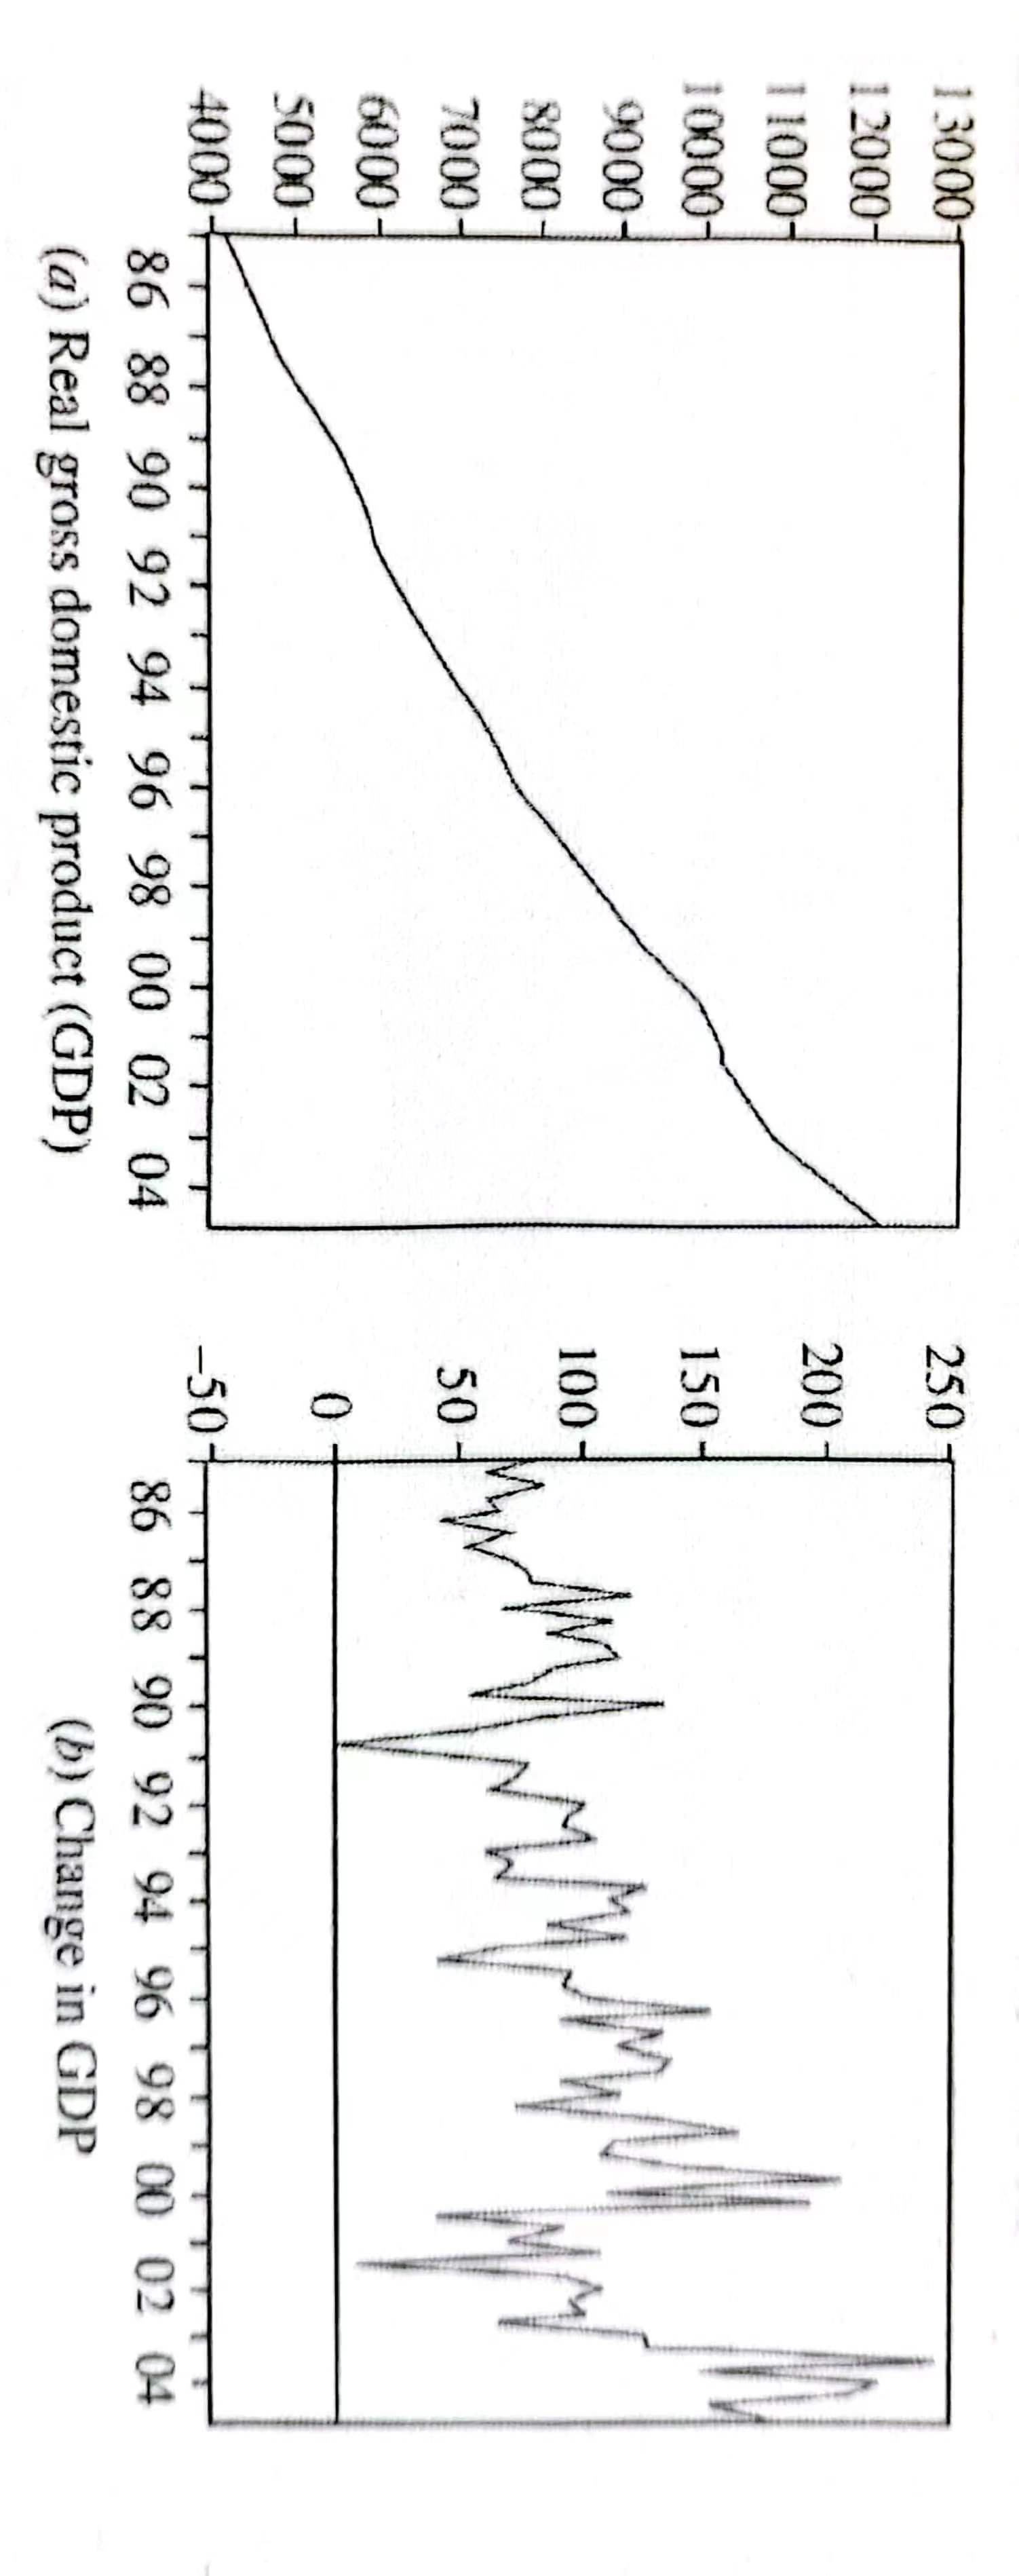

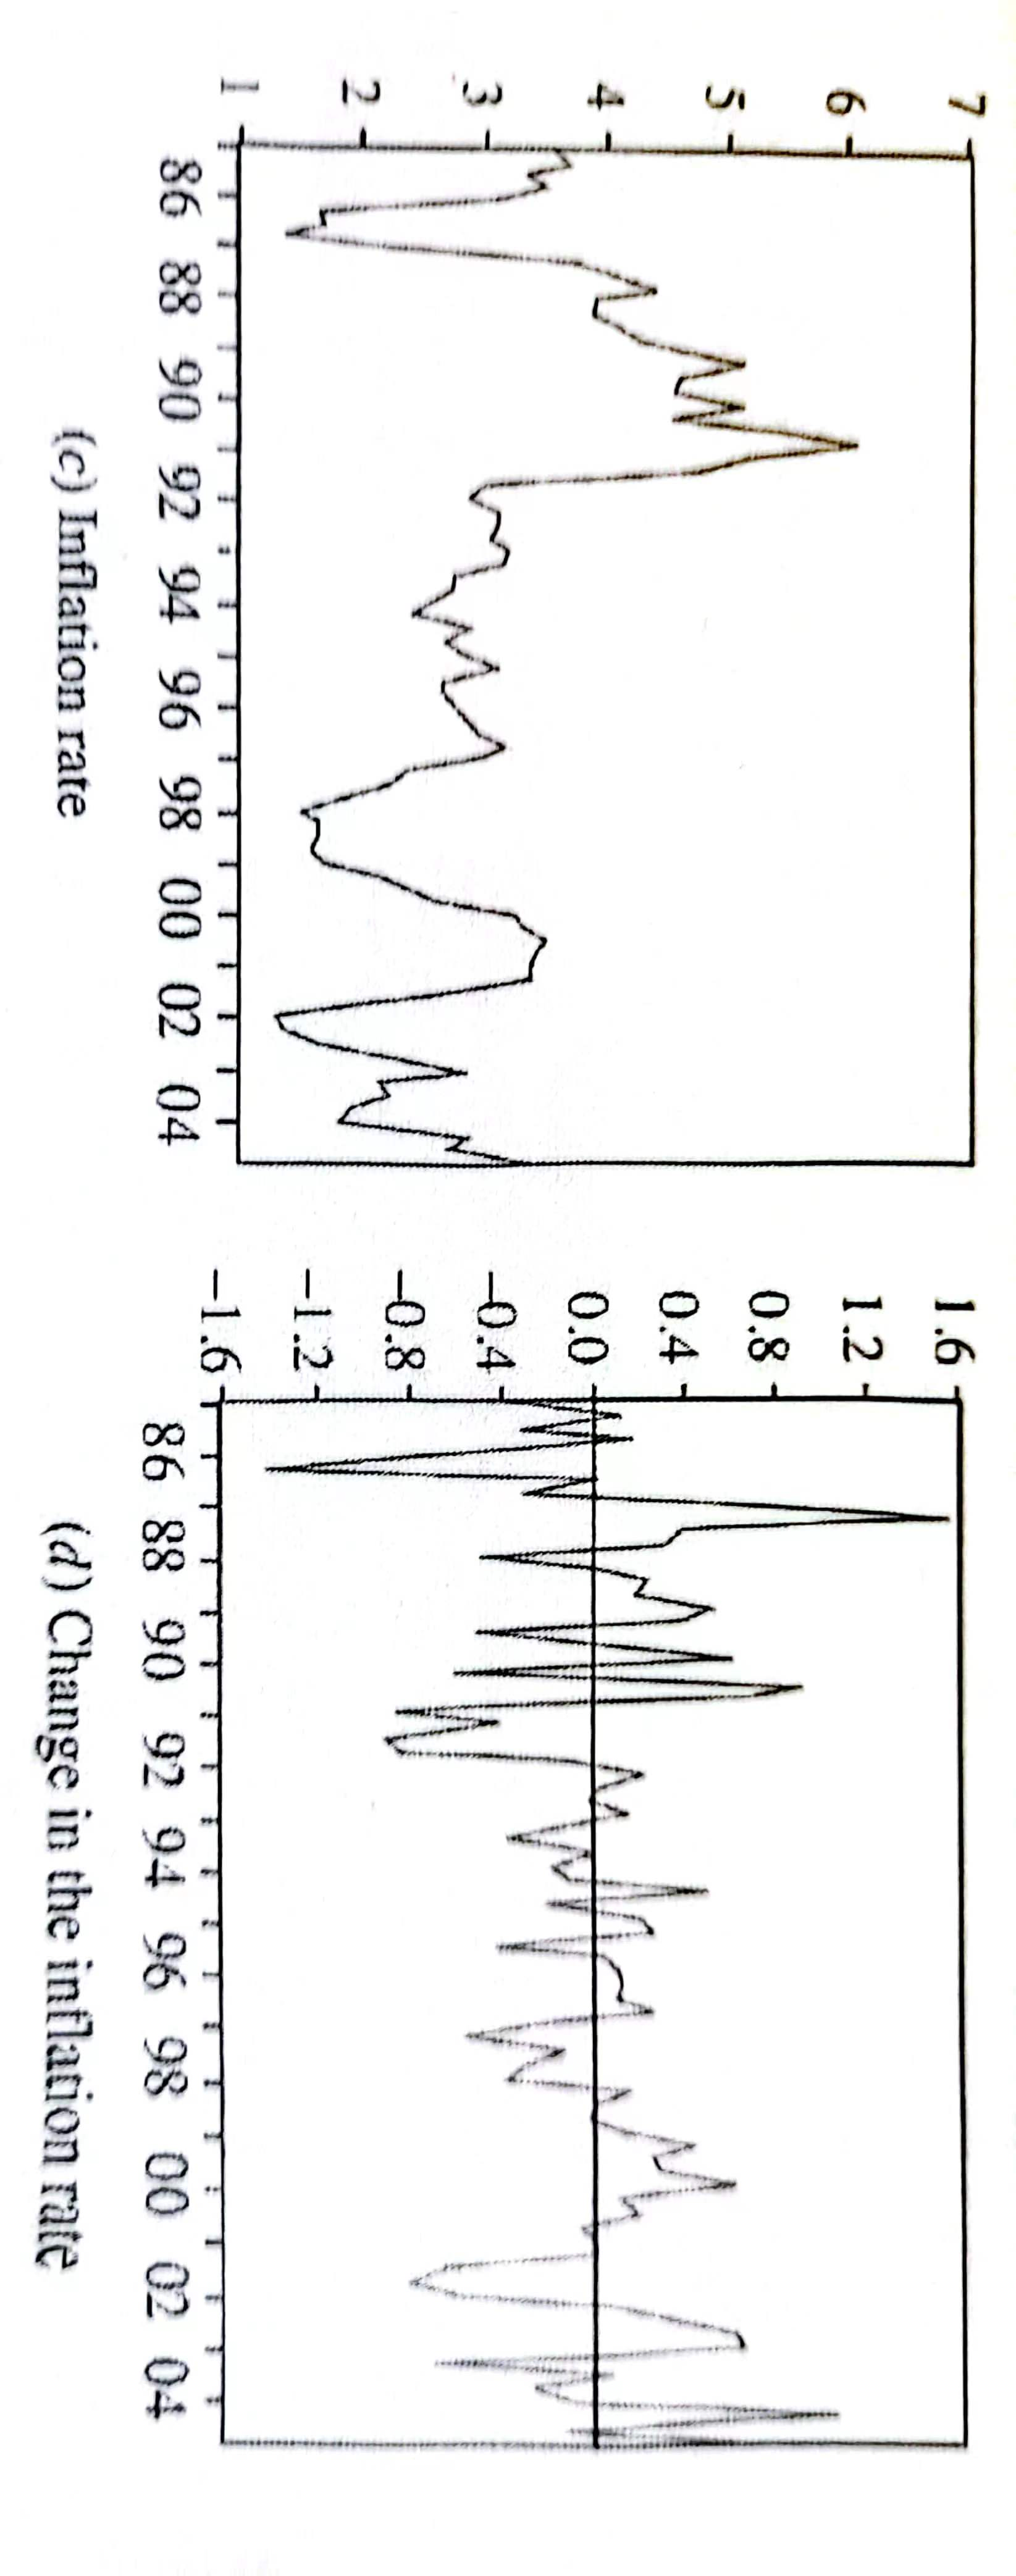

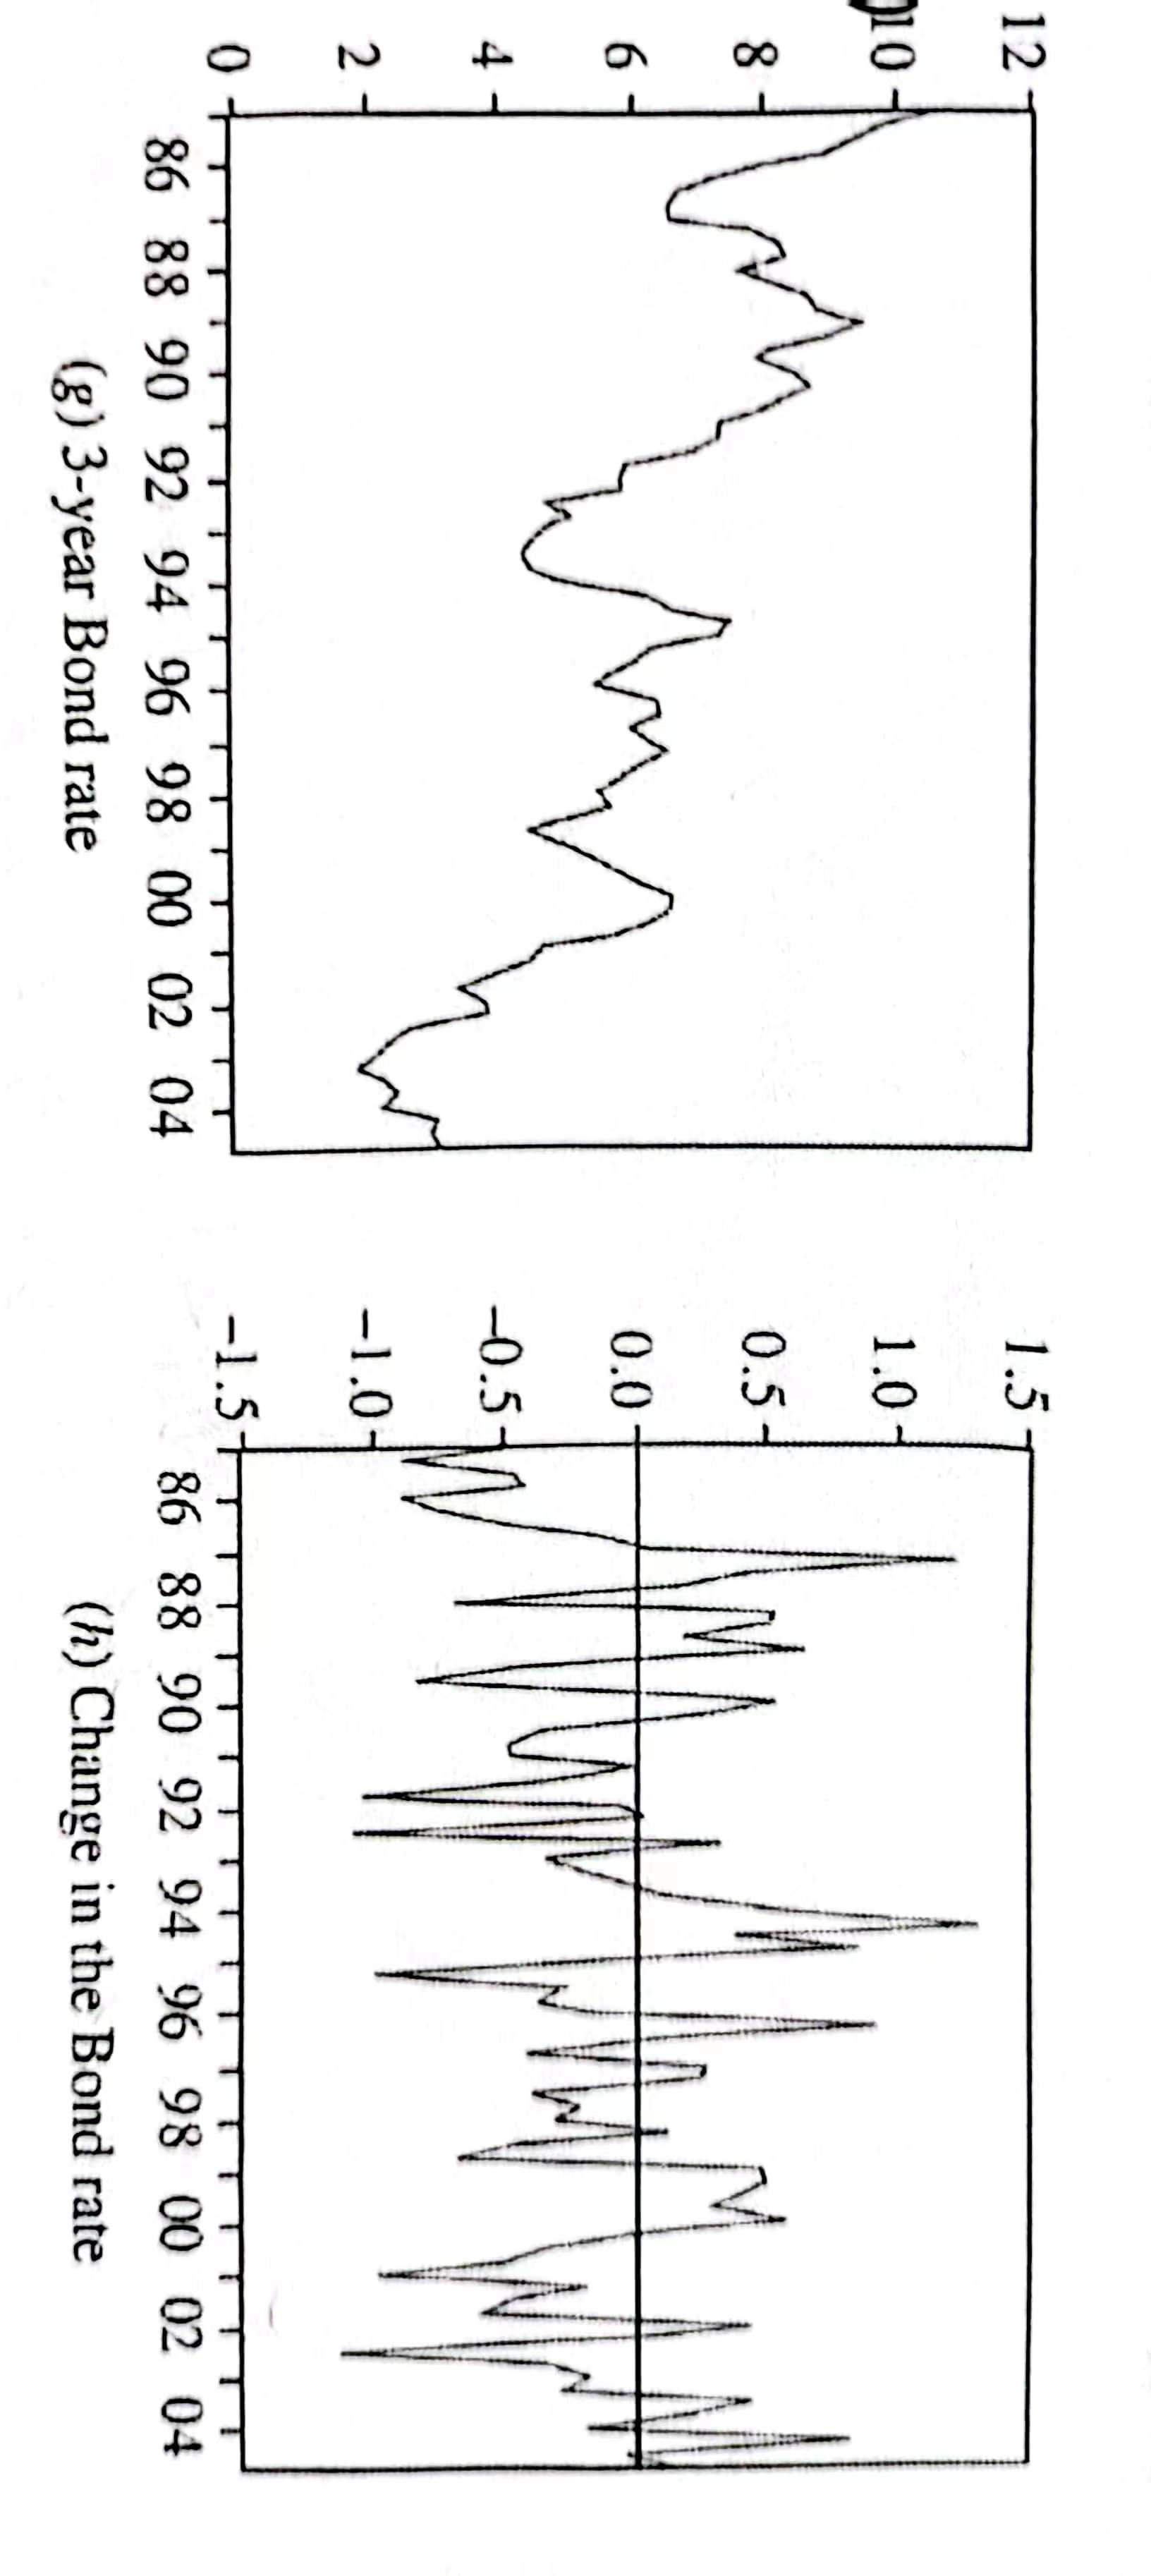

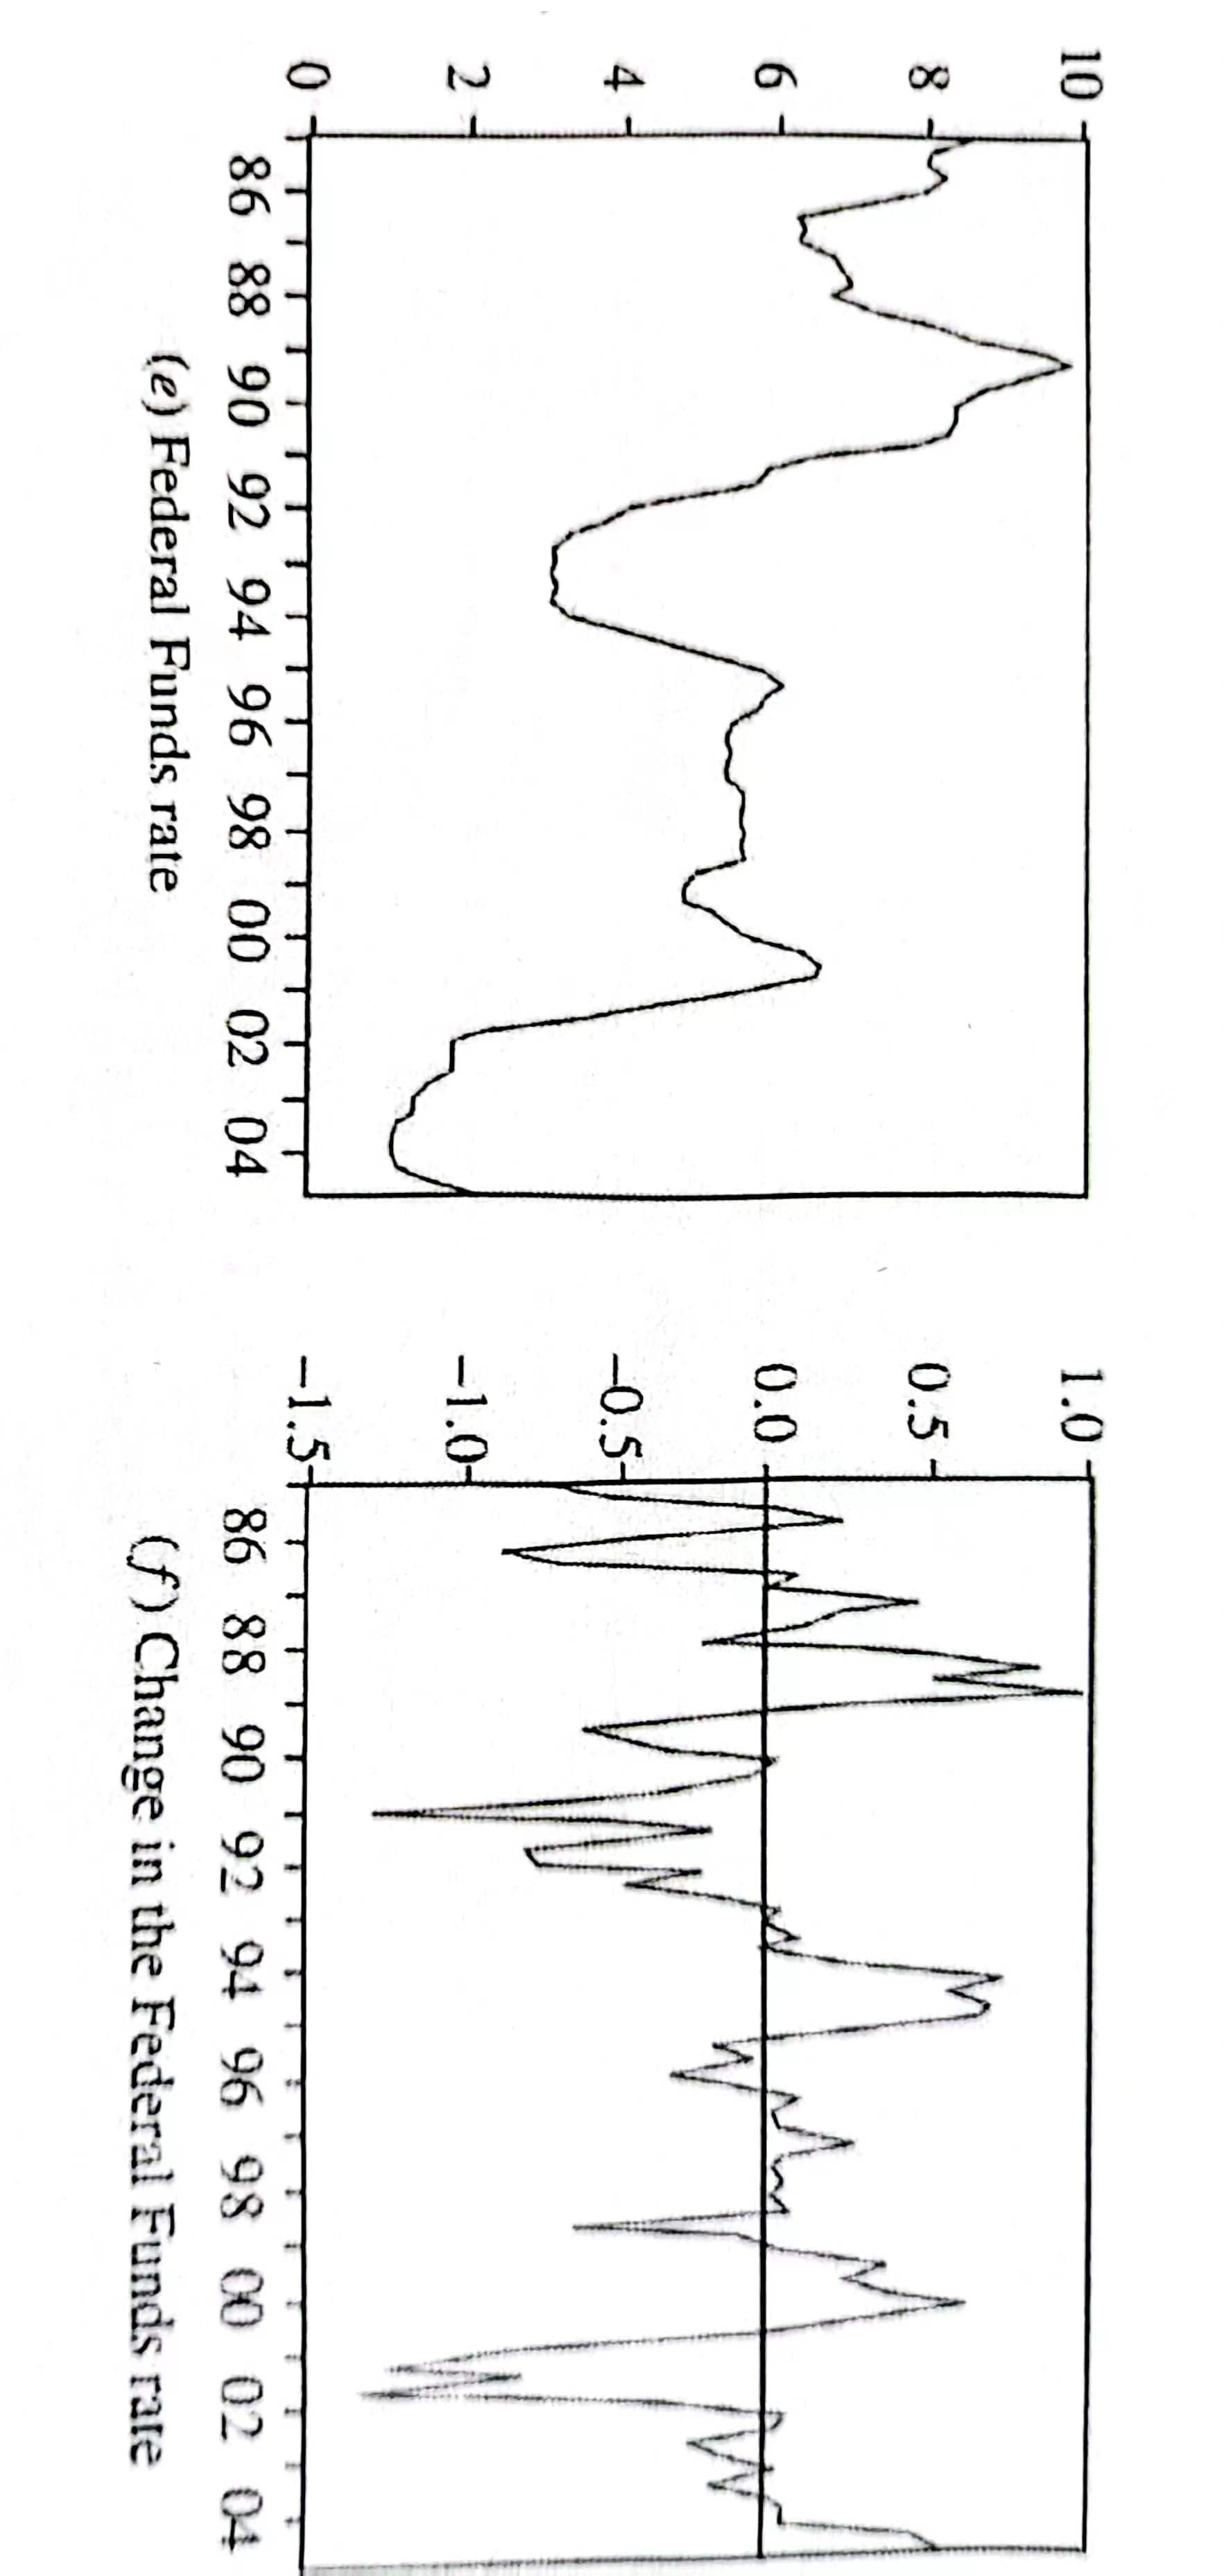

#### (2) Attention


- **Stationary is the most important property of time series data.**  


- When applying non-stationary data for analysis, it is important to be aware of the potential occurrence of **spurious regression errors**.

## Classical Linear Model Assumptions for Time Series Regression

Following is a summary of the six classical linear model (CLM) assumptions for time series regression applications. **Assumptions TS.1 through TS.5 are the time series versions of the Gauss-Markov assumptions** (which implies that OLS is BLUE and has the usual sampling variances).   


We only needed TS.1, TS.2, and TS.3 to establish unbiasedness of OLS.   


As in the case of cross-sectional regression, the normality assumption, TS.6, was used so that we could perform exact statistical inference for any sample size.

**Assumption TS.1 (Linear in Parameters)** <br>
The stochastic process {${(x_{t1}, x_{t1},...,x_{tk}, y_t):t=1,2,...,n}$} follows the linear model
$$y_t = \beta_0 + \beta_1x_{t1} + \beta_2x_{t2}+ ... +\beta_kx_{tk}+ \mu_t$$
where ${\mu_t:t=1,2,...,n}$ is the sequence of errors or disturbances. Here, n is the number of observations (time periods).<br>
 <br>
**Assumption TS.2 (No Perfect Collinearity)** <br>
In the underlying time series process, no independent variable is constant nor a perfect linear combination of the others. <br>
<br>
**Assumption TS.3 (Zero Conditional Mean)** <br>  
For each $t$, the expected value of the error $\mu_t$, given the explanatory variables for all time periods, is zero. Mathematically, $$E(\mu_t|X)=0,\ t=1,2,...,n$$
Assumption TS.3 implies that the error in each time period $t$ is uncorrelated with all explanatory variables in all time periods.

**Assumption TS.4 (Homoskedasticity)** <br>
Conditional on $X$, the variance of $\mu_t$ is the same for all $$t:Var(\mu_t|X) = Var(\mu_t)=\sigma^2, t=1,2,...,n$$.
<br>
**Assumption TS.5 (No Serial Correlation)** <br>
Conditional on $X$, the errors in two different time periods are uncorrelated:
$$Cor(\mu_t,\mu_s|X)=0\ \ \  for\ all\  t \not= s $$
Spurious Regression：Assumption TS.5 is often violated in ways that can make the usual statistical inference very unreliable.<br>
<br>
**Assumption TS.6 (Normality)** <br>
The errors $u_t$ are independent of $X$ and are independently and identically distributed as {$Normal(0,\sigma^2)$}.